# Customer segmentation | K Means Clustering

<b>- Importing the libraries</b>

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

<b>- Importing the Dataset</b>

In [2]:
data = pd.read_csv("csv/customers_segment.csv")
data.head()

,age,income,store_image,price_deal,ad_support,distribution,price_perception
0,37,6000,3.000000,3.333333,3.000000,3.5,3.333333
1,44,3500,4.571429,4.333333,4.333333,4.5,4.333333
2,24,7000,3.000000,3.666667,3.333333,3.5,2.666667
3,24,8400,2.571429,2.666667,3.390760,3.5,3.283142
4,22,5000,3.000000,3.791789,2.000000,2.0,2.333333


<b>- Screening the dataset</b>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               262 non-null    int64  
 1   income            262 non-null    int64  
 2   store_image       262 non-null    float64
 3   price_deal        262 non-null    float64
 4   ad_support        262 non-null    float64
 5   distribution      262 non-null    float64
 6   price_perception  262 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 14.5 KB


<p style="color:blue">Hurray! there's no non-null value, so no need for data cleaning.

<b>- Identifying the optimal number of clusters</b>

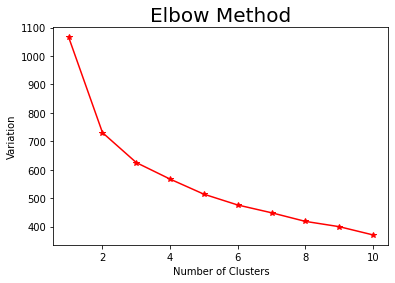

[1065.7499376793708, 730.4082089833535, 625.0846440315738, 567.0107618398637, 513.9918079560739, 476.02961034282487, 448.70351285559383, 418.4144806240495, 399.84732332319646, 370.8641823680047]


In [4]:
# required variable for clustering
x = data.iloc[:,2:].values

# using the elbow method to find out the optimal number of clusters
variation = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    variation.append(kmeans.inertia_)

# plotting the variation with the number of clusters
plt.plot(range(1,11),variation, marker= '*',  c = 'red')
plt.title("Elbow Method", size=20)
plt.xlabel("Number of Clusters")
plt.ylabel("Variation")
plt.show()
print(variation)

<p style="color:blue">As you can see after the second iteration there is less variation. It indicates we can choose <u>2 Clusters</u> Even you can choose three clusters provided each cluster is 'sizable', you will know it at the end.

<b>- Initializing the K-Means clustering</b>

In [5]:
# applying kmeans algorithm with the number of clusters and iteration
km = KMeans(n_clusters=2, max_iter=200)
clusters = km.fit_predict(x)
clusters

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [6]:
# joining the predicted label to the dataframe 
df = pd.DataFrame(clusters, columns=["label"])
jn = data.join(df)
jn.head()

,age,income,store_image,price_deal,ad_support,distribution,price_perception,label
0,37,6000,3.000000,3.333333,3.000000,3.5,3.333333,1
1,44,3500,4.571429,4.333333,4.333333,4.5,4.333333,0
2,24,7000,3.000000,3.666667,3.333333,3.5,2.666667,0
3,24,8400,2.571429,2.666667,3.390760,3.5,3.283142,1
4,22,5000,3.000000,3.791789,2.000000,2.0,2.333333,1


In [7]:
# number of cases in each clusters
print("Total counts: ", jn['label'].count())
jn['label'].value_counts()

Total counts:  262


0    135
1    127
Name: label, dtype: int64

<b>- Final Cluster Centers</b>

In [8]:
# getting the mean distances of all the features and each clusters
c = km.cluster_centers_
centers = pd.DataFrame(c,columns=["Store Image", "Price Deal", "Ad Support", "Distribution", "Price Perception"])
table = pd.pivot_table(centers, columns=[0,1])
table

,0,1
Ad Support,3.923341,2.838981
Distribution,4.156847,2.657480
Price Deal,3.649472,2.702434
Price Perception,3.480382,3.031604
Store Image,3.730274,2.954208


<p style="color:blue">From the two cluster solution,</p>
<ul style="color:blue"><u>Cluster-1</u> : Happy Consumers, since there means are closer to 4 and above</ul>
<ul style="color:blue"><u>Cluster-2</u> : Unhappy Consumers, means are less</ul>

<b>- Radar Chart</b>

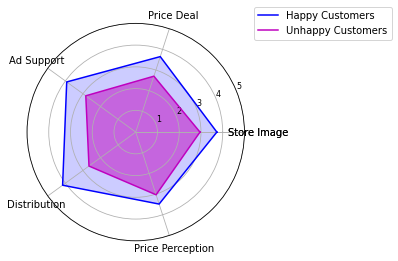

In [9]:
# creating the radar chaart to display the clusters
categories = ["Store Image", "Price Deal", "Ad Support", "Distribution", "Price Perception"]
categories = [*categories, categories[0]]

v1 = c[0]
v1 = [*v1, v1[0]]
v2 = c[1]
v2 = [*v2, v2[0]]

label = np.linspace(start=0, stop=2*np.pi,num=len(v1))

plt.subplot(polar=True)
plt.plot(label, v1, label='Happy Customers', color= 'b')
plt.fill(label, v1, 'b', alpha=0.2)
plt.plot(label, v2, label='Unhappy Customers', color= 'm')
plt.fill(label, v2, 'm', alpha=0.5)
lines = plt.thetagrids(np.degrees(label), labels=categories)
plt.legend(loc="upper right", bbox_to_anchor=(1.7,1.1))
plt.yticks([1,2,3,4,5], color="black", size=8)
plt.show()

<b>- Scatter Plot</b>

Taking the Distribution and Ad support variables i.e,(top two variables where the mean values are vastly different between the clusters) to visualize the clusters in 2D scatter plot

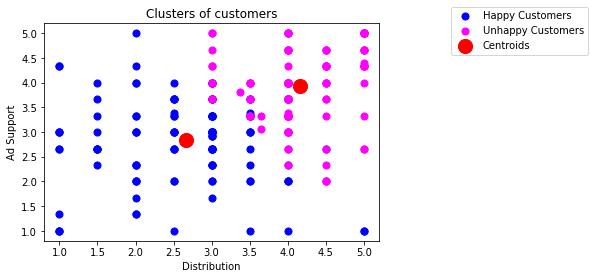

In [10]:
# Visualising the clusters in 2D satter plot
plt.scatter(x[clusters == 1, 3], x[clusters == 1,2],s = 50, c='blue', label = 'Happy Customers')
plt.scatter(x[clusters == 0, 3], x[clusters == 0,2],s = 50, c='magenta', label = 'Unhappy Customers')
plt.scatter([4.156847, 2.657480], [3.923341,2.838981], s = 200, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Distribution')
plt.ylabel('Ad Support')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

As you can see some points are seems to be not correctly clustered based on the centroid, remember that there are three variables included to classify the clusters

<mark style="background-color:yellow"><b>Note: </b>If logical, you may initialize cluster-3, provided it is meaningful</mark>